In [1]:
from jax import config
config.update('jax_enable_x64', True)
from pathlib import Path

import jax
import gpjax as gpx
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt

from uncprop.utils.experiment import Experiment
from uncprop.models.vsem.experiment import VSEMReplicate
from uncprop.utils.grid import Grid, DensityComparisonGrid
from uncprop.utils.plot import set_plot_theme

colors = set_plot_theme()
base_dir = Path('/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper')

/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
key = jr.key(9768565)
setup_kwargs = {'n_grid': 50, 'n_design': 8, 'noise_sd': 1.0, 'verbose': False}
num_reps = 3
experiment_name = 'vsem'
out_dir = base_dir / 'out' / experiment_name

# 3 cases: n = 4, 8, and one other (maybe 16)

def _make_subdir_name(setup_kwargs, run_kwargs):
    return f'{run_kwargs['surrogate_tag']}_N{setup_kwargs['n_design']}'

experiment = Experiment(name=experiment_name,
                        num_reps=num_reps,
                        base_out_dir=out_dir,
                        base_key=key,
                        Replicate=VSEMReplicate,
                        subdir_name_fn=_make_subdir_name)

results_gp, failed_iters_gp = experiment(run_kwargs={'surrogate_tag': 'gp'}, 
                                         setup_kwargs=setup_kwargs)

results_clip_gp, failed_iters_clip_gp = experiment(run_kwargs={'surrogate_tag': 'clip_gp'}, 
                                                   setup_kwargs=setup_kwargs)

Creating new output directory: /Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/out/vsem
Creating experiment sub-directory: /Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/out/vsem/gp_N8
Running replicate 0
Initial loss 28.718050885856716
Final loss 24.436779752613223
gp scale: 28.513625879190453
gp lengthscales: [0.56113303 8.23047644]
gp noise std dev: 0.14256765781354339
Running replicate 1
Initial loss 18.273208996209377
Final loss 14.395938624599387
gp scale: 6.489299570587513
gp lengthscales: [0.48927865 6.27658351]
gp noise std dev: 0.00010265492796645973
Running replicate 2
Initial loss 68.66589168703823
Final loss 65.69859221933324
gp scale: 2908.7852239989525
gp lengthscales: [0.48663492 5.21084425]
gp noise std dev: 20.166224844216195
Creating experiment sub-directory: /Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/out/vsem/clip_gp_N8
Running replicate 0
Initial loss 28.718050885856716
Final loss 24.436779752613223
gp scale: 28.51362587919

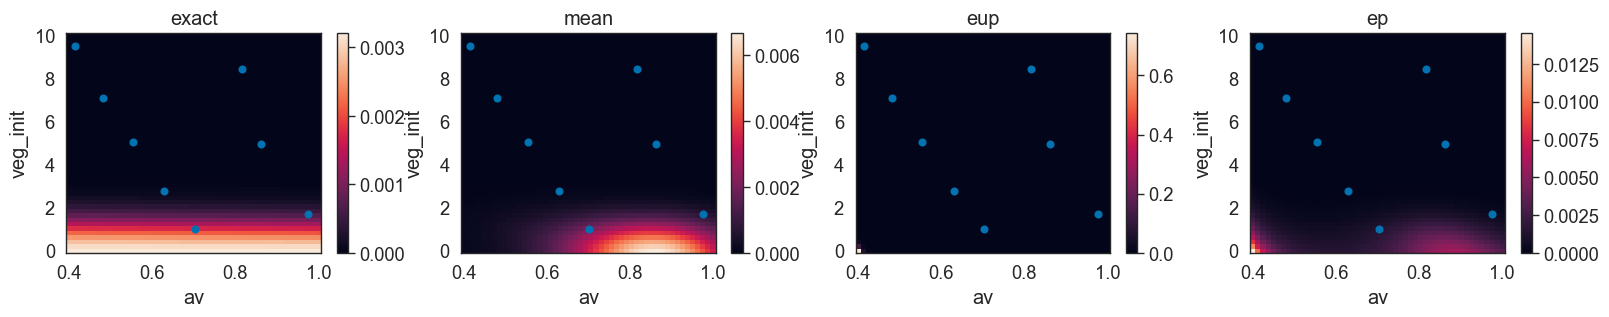

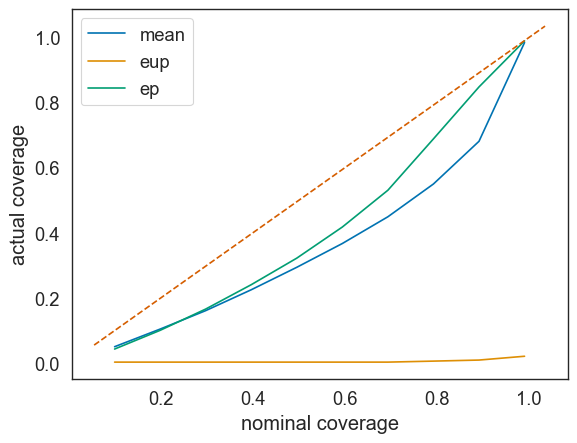

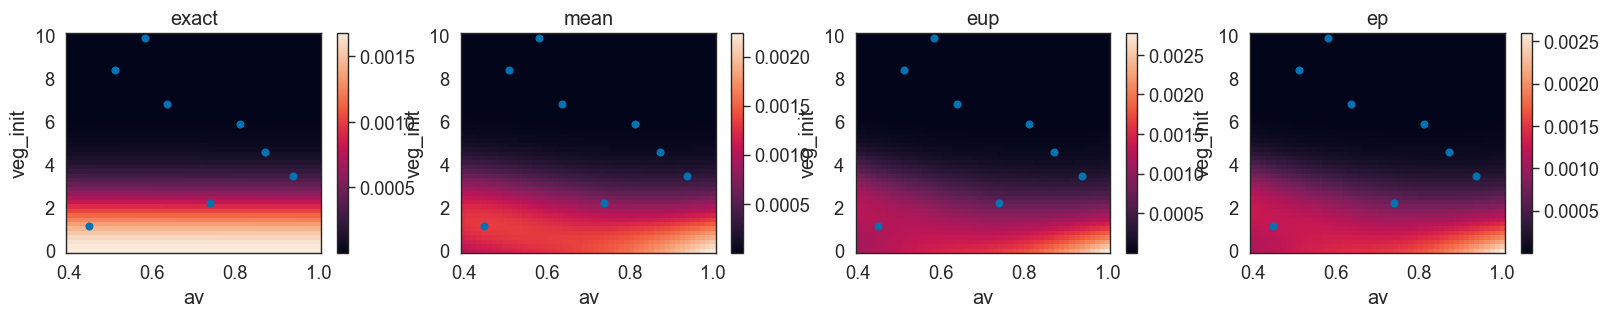

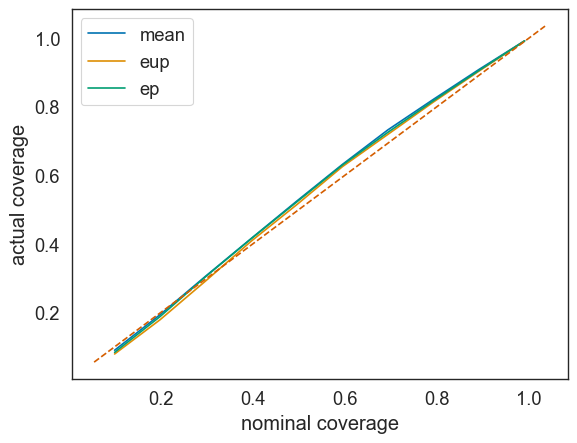

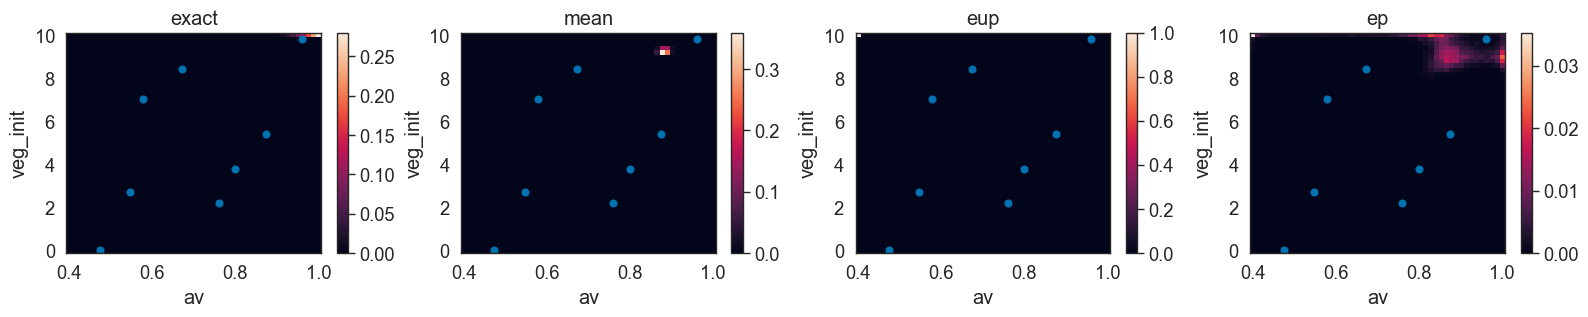

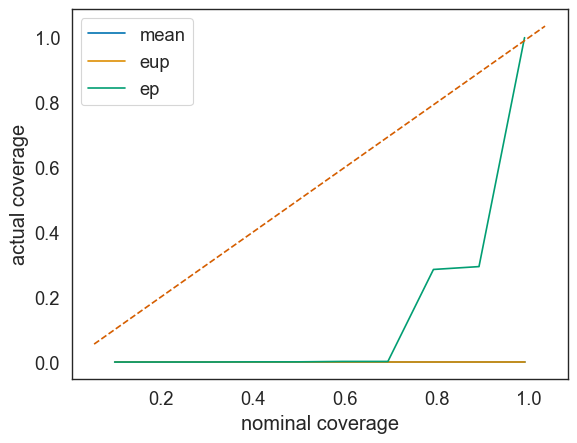

In [4]:
for rep in results_gp:
    rep.density_comparison.plot(normalized=True, log_scale=False,
                                max_cols=4, points=rep.surrogate_posterior_gp.surrogate.design.X)
    rep.density_comparison.plot_coverage(baseline='exact')

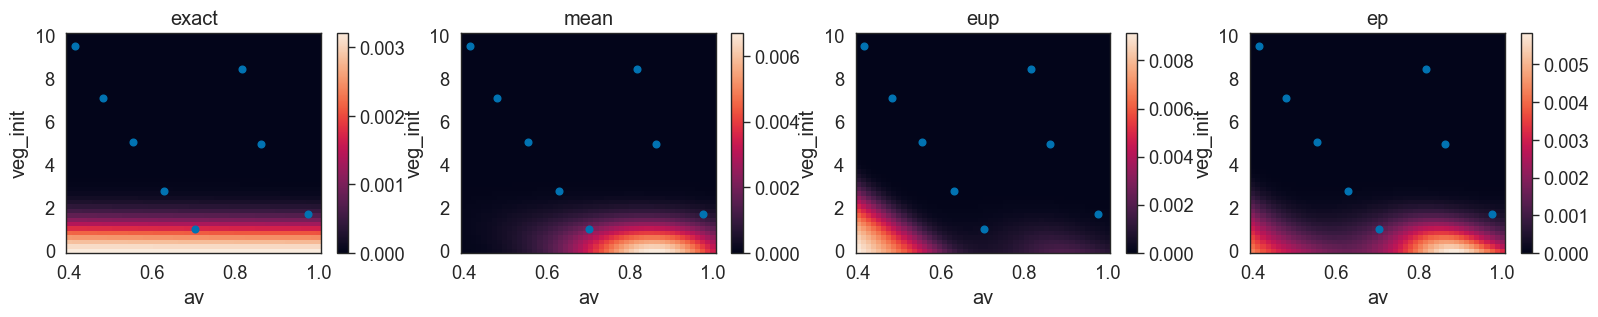

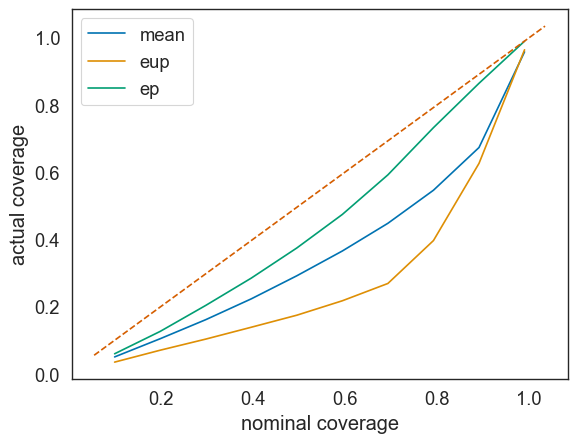

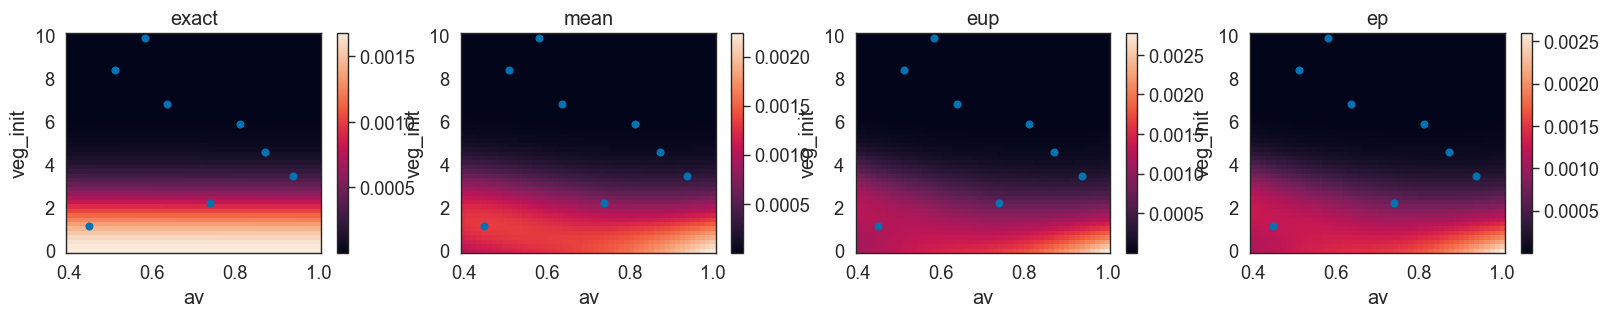

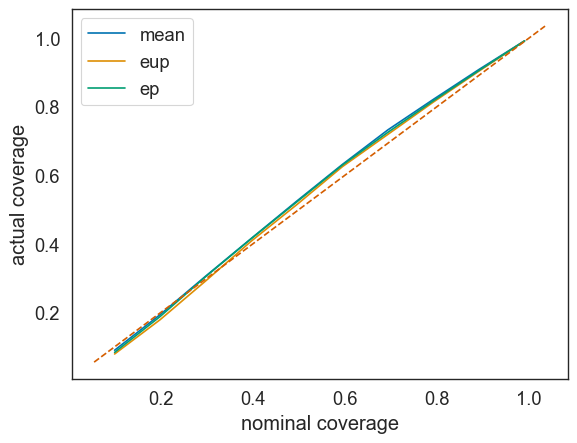

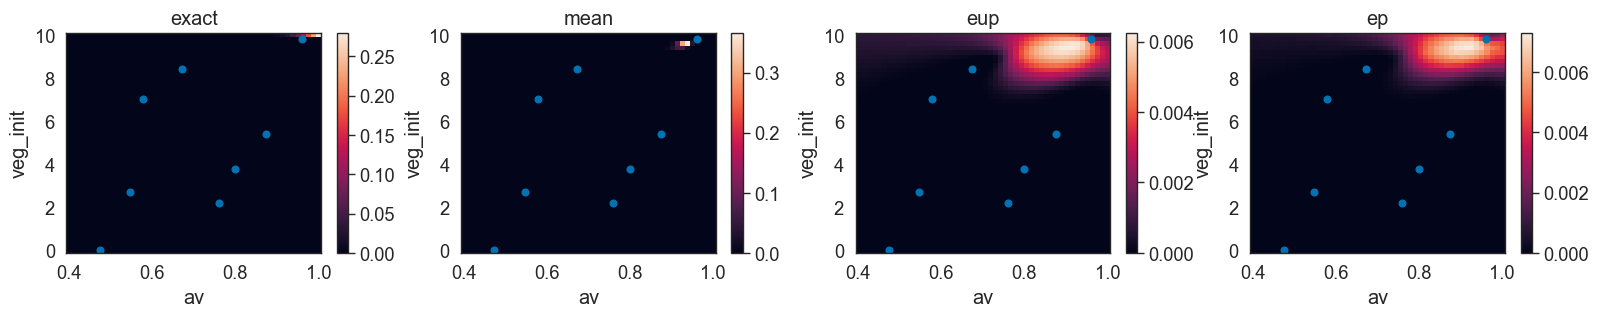

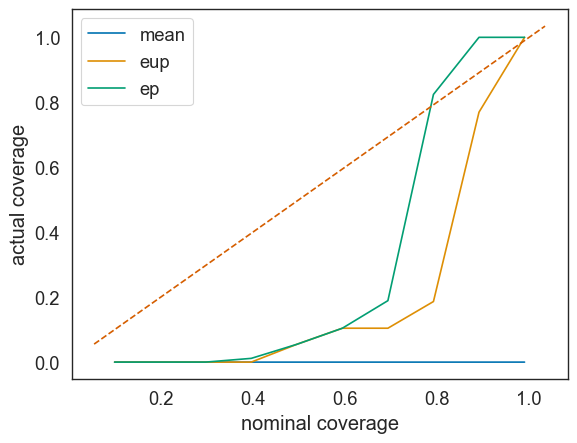

In [5]:
for rep in results_clip_gp:
    rep.density_comparison.plot(normalized=True, log_scale=False,
                                max_cols=4, points=rep.surrogate_posterior_clip_gp.surrogate.design.X)
    rep.density_comparison.plot_coverage(baseline='exact')

In [ ]:
from uncprop.utils.grid import plot_coverage_curve_reps

log_coverage_reps = jnp.stack(
    [rep.density_comparison.calc_coverage(baseline='exact')[0] for rep in results_clip_gp],
    axis=0
)

probs = results_clip_gp[0].density_comparison.calc_coverage(baseline='exact')[1]

fig, ax = plot_coverage_curve_reps(log_coverage_reps, probs=probs, names=['mean', 'eup', 'ep'])

In [ ]:
# summarize surrogate mean and sd
pred = surrogate_posterior.surrogate(grid.flat_grid)

grid.plot(z=pred.mean, title='surrogate mean', points=design.X)
grid.plot(z=jnp.sqrt(pred.variance), title='surrogate sd', points=design.X)

In [ ]:
# sampling posterior
key, key_mcmc = jr.split(key, 2)

samp = posterior.sample(key, n=3000, num_warmup_steps=500) # returns HMCState with samp.position (n, 1, 2)

plt.hist(samples[:,0])
plt.show()

In [ ]:
density_comparison.plot(['exact', 'mean', 'eup', 'ep'],
                         normalized=True, log_scale=False,
                         max_cols=4, points=design.X)

In [ ]:
from uncprop.utils.grid import get_grid_coverage_mask, plot_2d_mask

mask = get_grid_coverage_mask(log_prob=density_comparison.log_dens_norm_grid['ep'],
                              probs=jnp.linspace(0.1, 0.9, 30))

fig, ax = plot_2d_mask(mask, grid.shape, prob_idx=[0, 15, 20])

# TEMP

In [ ]:
import blackjax

In [ ]:
mwg_init_x = blackjax.rmh.init